# **Deep Learning With Python  -  CHAPTER 3**

- This code provides a structured and modular approach to building, training, and evaluating machine learning models using TensorFlow and Keras.

- The `TensorOperations` class handles tensor creation and basic mathematical operations, while `GradientCalculator` computes gradients using `GradientTape`. The `DataGenerator` class generates synthetic data for training, and `LinearModel` defines a simple linear regression model.

- The `Trainer` class manages the training process using gradient descent. For deep learning models, the `CustomDenseLayer` class implements a custom dense layer, and `KerasModel` builds a multi-layer neural network with Keras.

- Finally, the `ModelEvaluator` class is responsible for evaluating and predicting outcomes. This well-organized structure ensures reusability, scalability, and ease of experimentation with different models.

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [18]:
class TensorOperations:
    @staticmethod
    def create_tensors():
        tensors = {
            "ones": tf.ones(shape=(2, 1)),
            "zeros": tf.zeros(shape=(2, 1)),
            "normal": tf.random.normal(shape=(3, 1), mean=0., stddev=1.),
            "uniform": tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
        }
        return tensors

    @staticmethod
    def variable_operations():
        v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
        v.assign(tf.ones((3, 1)))
        v[0, 0].assign(3.)
        v.assign_add(tf.ones((3, 1)))
        return v

    @staticmethod
    def math_operations():
        a = tf.ones((2, 2))
        b = tf.square(a)
        c = tf.sqrt(a)
        d = b + c
        e = tf.matmul(a, b)
        e *= d
        return e

In [19]:
class GradientCalculator:
    @staticmethod
    def compute_gradient():
        input_var = tf.Variable(initial_value=3.)
        with tf.GradientTape() as tape:
            result = tf.square(input_var)
        return tape.gradient(result, input_var)

    @staticmethod
    def compute_second_derivative():
        time = tf.Variable(0.)
        with tf.GradientTape() as outer_tape:
            with tf.GradientTape() as inner_tape:
                position =  4.9 * time ** 2
            speed = inner_tape.gradient(position, time)
        acceleration = outer_tape.gradient(speed, time)
        return acceleration

In [20]:
class DataGenerator:
    def __init__(self, num_samples=1000):
        self.num_samples = num_samples
        self.inputs, self.targets = self.generate_data()

    def generate_data(self):
        negative_samples = np.random.multivariate_normal(
            mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=self.num_samples
        )
        positive_samples = np.random.multivariate_normal(
            mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=self.num_samples
        )
        inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
        targets = np.vstack((
            np.zeros((self.num_samples, 1), dtype="float32"),
            np.ones((self.num_samples, 1), dtype="float32")
        ))
        return inputs, targets

    def plot_data(self):
        plt.scatter(self.inputs[:, 0], self.inputs[:, 1], c=self.targets[:, 0])
        plt.show()

In [21]:
class LinearModel:
    def __init__(self, input_dim=2, output_dim=1):
        self.W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
        self.b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

    def predict(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

    def loss(self, targets, predictions):
        per_sample_losses = tf.square(targets - predictions)
        return tf.reduce_mean(per_sample_losses)

In [22]:
class Trainer:
    def __init__(self, model, learning_rate=0.1):
        self.model = model
        self.learning_rate = learning_rate

    def training_step(self, inputs, targets):
        with tf.GradientTape() as tape:
            predictions = self.model.predict(inputs)
            loss = self.model.loss(targets, predictions)
        grad_W, grad_b = tape.gradient(loss, [self.model.W, self.model.b])
        self.model.W.assign_sub(grad_W * self.learning_rate)
        self.model.b.assign_sub(grad_b * self.learning_rate)
        return loss

    def train(self, inputs, targets, epochs=40):
        for step in range(epochs):
            loss = self.training_step(inputs, targets)
            print(f"Loss at step {step}: {loss:.4f}")

In [23]:
class CustomDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation:
            y = self.activation(y)
        return y

In [25]:
class KerasModel:
    def __init__(self):
        self.model = keras.Sequential([
            CustomDenseLayer(32, activation=tf.nn.relu),
            CustomDenseLayer(64, activation=tf.nn.relu),
            CustomDenseLayer(32, activation=tf.nn.relu),
            CustomDenseLayer(10, activation=tf.nn.softmax)
        ])
        self.model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["accuracy"])

    def train(self, inputs, targets, epochs=5, batch_size=128):
        history = self.model.fit(inputs, targets, epochs=epochs, batch_size=batch_size)
        return history.history

In [26]:
class ModelEvaluator:
    def __init__(self, model):
        self.model = model

    def evaluate(self, val_inputs, val_targets, batch_size=128):
        predictions = self.model.predict(val_inputs, batch_size=batch_size)
        print(predictions[:10])

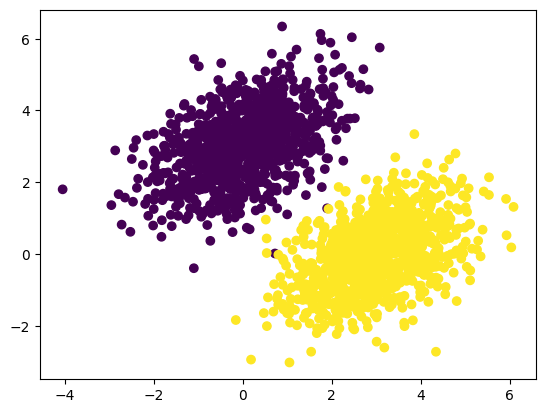

In [27]:
data_gen = DataGenerator()
data_gen.plot_data()

In [28]:
linear_model = LinearModel()
trainer = Trainer(linear_model)
trainer.train(data_gen.inputs, data_gen.targets, epochs=40)

Loss at step 0: 2.1773
Loss at step 1: 0.2919
Loss at step 2: 0.1341
Loss at step 3: 0.1093
Loss at step 4: 0.1006
Loss at step 5: 0.0942
Loss at step 6: 0.0886
Loss at step 7: 0.0835
Loss at step 8: 0.0788
Loss at step 9: 0.0744
Loss at step 10: 0.0705
Loss at step 11: 0.0668
Loss at step 12: 0.0635
Loss at step 13: 0.0604
Loss at step 14: 0.0576
Loss at step 15: 0.0550
Loss at step 16: 0.0526
Loss at step 17: 0.0504
Loss at step 18: 0.0484
Loss at step 19: 0.0466
Loss at step 20: 0.0449
Loss at step 21: 0.0433
Loss at step 22: 0.0419
Loss at step 23: 0.0406
Loss at step 24: 0.0394
Loss at step 25: 0.0383
Loss at step 26: 0.0373
Loss at step 27: 0.0364
Loss at step 28: 0.0355
Loss at step 29: 0.0347
Loss at step 30: 0.0340
Loss at step 31: 0.0334
Loss at step 32: 0.0328
Loss at step 33: 0.0322
Loss at step 34: 0.0317
Loss at step 35: 0.0312
Loss at step 36: 0.0308
Loss at step 37: 0.0304
Loss at step 38: 0.0300
Loss at step 39: 0.0297


In [29]:
keras_model = KerasModel()
keras_model.train(data_gen.inputs, data_gen.targets, epochs=5)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.4221
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0015 - loss: 0.4141     
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0160 - loss: 0.4143 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0436 - loss: 0.4059 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0819 - loss: 0.4063 


{'accuracy': [0.0,
  0.005499999970197678,
  0.023000000044703484,
  0.05299999937415123,
  0.09549999982118607],
 'loss': [0.4100000262260437,
  0.4100000560283661,
  0.4100000262260437,
  0.4100000262260437,
  0.4099999964237213]}

In [30]:
evaluator = ModelEvaluator(keras_model.model)
evaluator.evaluate(data_gen.inputs, data_gen.targets)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.1000107  0.09996241 0.10000938 0.0999283  0.10001905 0.10000356
  0.10000276 0.09998804 0.10000961 0.10006621]
 [0.10003782 0.09996597 0.10001119 0.09988645 0.10002056 0.09999523
  0.10001875 0.09997721 0.10000805 0.10007863]
 [0.09991915 0.09983701 0.09998801 0.09990538 0.10010196 0.10003131
  0.10000634 0.09996994 0.1000315  0.10020938]
 [0.10004576 0.10001397 0.09998065 0.09997207 0.09997971 0.09999125
  0.10003085 0.09999443 0.09998326 0.10000804]
 [0.10000481 0.09998628 0.10000978 0.09996288 0.10000216 0.10000296
  0.09999863 0.09999463 0.10000475 0.10003313]
 [0.1000381  0.09997925 0.10001086 0.09990038 0.10001059 0.09999306
  0.10002163 0.09997994 0.10000379 0.10006239]
 [0.09996268 0.09989918 0.10000227 0.09991836 0.10005994 0.10001741
  0.10000227 0.09997996 0.10002375 0.10013416]
 [0.10006416 0.09995746 0.09992626 0.09993764 0.10002715 0.09998544
  0.10006765 0.09998814 0.09997857 0.10006754]
 [0.10002873 0.09993526 0.10000929 0.0998